--- Starting Task 2: Model Building and Training (modeling.ipynb) ---
Ensuring Task 1 Data Preparation is complete...
Datasets loaded successfully!
Dropped 1081 duplicate rows from CreditCard_Data.
Data Cleaning complete.
Applying IP to Country mapping for Fraud_Data (this may take a moment)...
IP to Country mapping complete!
IP to Country mapping complete.
Extracting time-based and velocity features for Fraud_Data...
Feature Engineering complete for Fraud_Data.
Feature Engineering complete.
Preprocessing pipeline for Fraud_Data defined.
Preprocessing pipeline for CreditCard_Data defined.
--- Task 1 Data Preparation complete. Proceeding to Task 2. ---

--- Performing Train-Test Split for Fraud_Data ---
Fraud_Data - Training set shape: (120889, 16), (120889,)
Fraud_Data - Test set shape: (30223, 16), (30223,)
Fraud_Data - y_train_fraud class distribution:
class
0    0.906352
1    0.093648
Name: proportion, dtype: float64
Fraud_Data - y_test_fraud class distribution:
class
0    0.906363


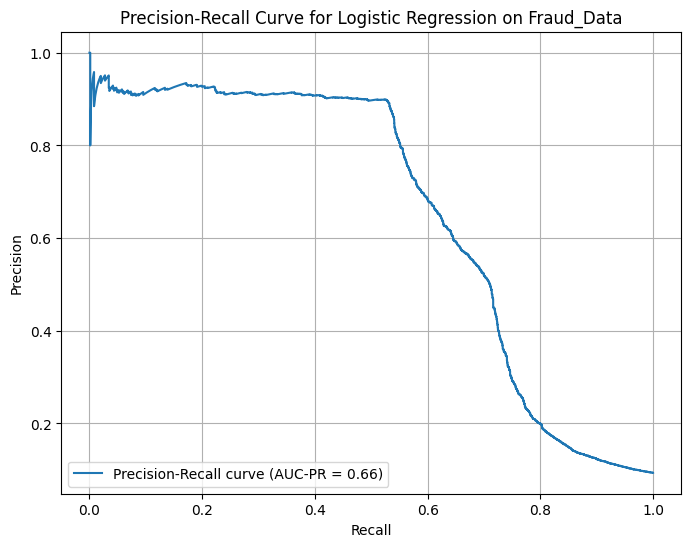

Training LightGBM...
[LightGBM] [Info] Number of positive: 109568, number of negative: 109568
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13580
[LightGBM] [Info] Number of data points in the train set: 219136, number of used features: 125
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM training complete.

--- LightGBM on Fraud_Data Evaluation Summary ---
F1-Score: 0.6910
AUC-ROC: 0.8445
AUC-PR: 0.7141
Confusion Matrix:
[[27387     6]
 [ 1333  1497]]


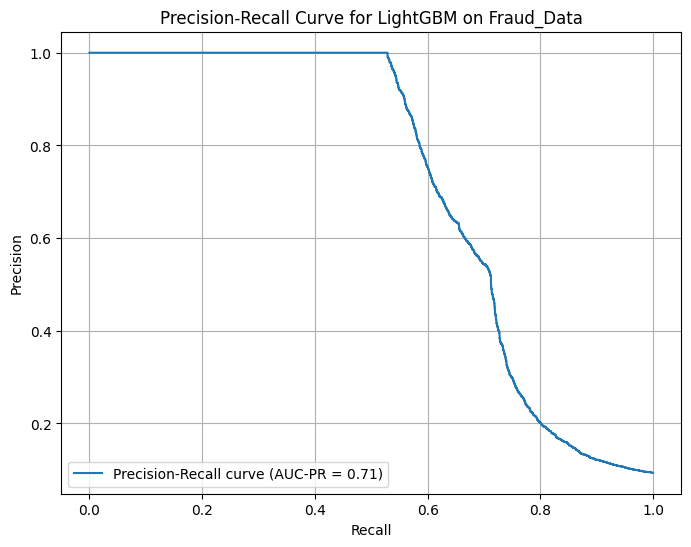


========== Training Models for CreditCard_Data ==========
Training Logistic Regression...
Logistic Regression training complete.

--- Logistic Regression on CreditCard_Data Evaluation Summary ---
F1-Score: 0.0987
AUC-ROC: 0.9625
AUC-PR: 0.7164
Confusion Matrix:
[[55147  1504]
 [   12    83]]


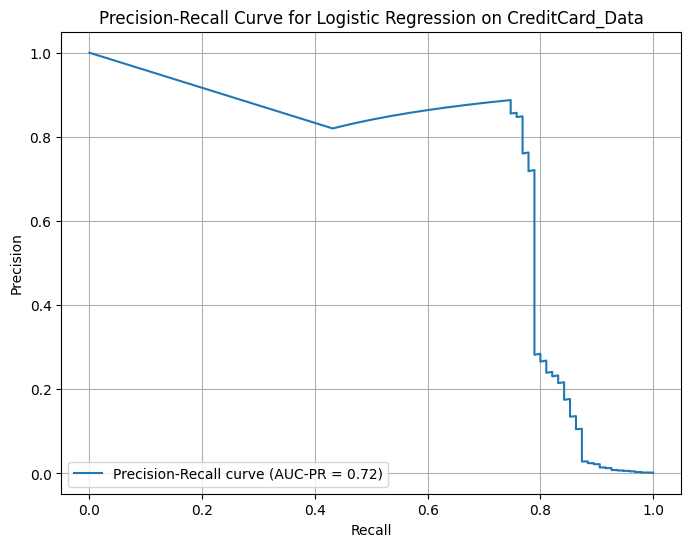

Training LightGBM...
[LightGBM] [Info] Number of positive: 22660, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024308 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 249262, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.090908 -> initscore=-2.302594
[LightGBM] [Info] Start training from score -2.302594
LightGBM training complete.

--- LightGBM on CreditCard_Data Evaluation Summary ---
F1-Score: 0.8488
AUC-ROC: 0.9723
AUC-PR: 0.8038
Confusion Matrix:
[[56647     4]
 [   22    73]]


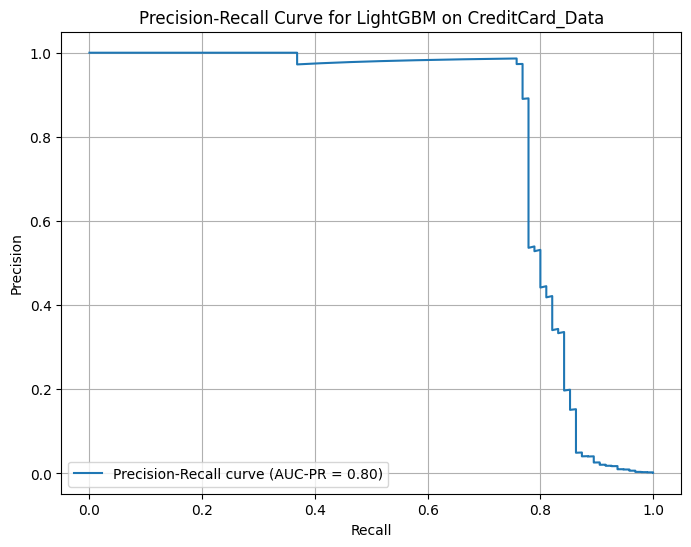


--- Task 2: Model Building and Training (modeling.ipynb) complete. ---


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
import sys
import os

# Add the project root to the Python path to enable importing from src
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Import functions from your new src modules
from src.data_loader import load_fraud_data, load_ip_to_country_data, load_credit_card_data
from src.data_cleaner import clean_fraud_data, clean_ip_to_country_data, clean_credit_card_data
from src.feature_engineer import apply_ip_to_country_mapping, engineer_fraud_features
from src.preprocessing_pipelines import get_fraud_preprocessor, get_credit_card_preprocessor
from src.models import train_logistic_regression_pipeline, train_lightgbm_pipeline
from src.evaluation import evaluate_model

# Suppress warnings for cleaner output in the notebook
warnings.filterwarnings('ignore')

print("--- Starting Task 2: Model Building and Training (modeling.ipynb) ---")

# --- Re-run Task 1 Data Preparation (or ensure outputs are available) ---
# This section ensures the data is prepared if running modeling.ipynb directly.
print("Ensuring Task 1 Data Preparation is complete...")

# Load datasets
try:
    fraud_data = load_fraud_data()
    ip_to_country = load_ip_to_country_data()
    credit_card_data = load_credit_card_data()
    print("Datasets loaded successfully!")
except Exception as e:
    print(f"Error loading files: {e}")
    raise SystemExit("Data files not found. Please check paths and directory structure.")

# Clean data
fraud_data = clean_fraud_data(fraud_data.copy())
ip_to_country = clean_ip_to_country_data(ip_to_country.copy())
credit_card_data = clean_credit_card_data(credit_card_data.copy())
print("Data Cleaning complete.")

# Geolocation mapping
fraud_data = apply_ip_to_country_mapping(fraud_data.copy(), ip_to_country)
print("IP to Country mapping complete.")

# Feature Engineering
fraud_data = engineer_fraud_features(fraud_data.copy())
print("Feature Engineering complete.")

# Define features and get preprocessors
X_fraud_pre_split = fraud_data.drop(['user_id', 'signup_time', 'purchase_time', 'device_id', 'ip_address', 'class'], axis=1)
y_fraud_pre_split = fraud_data['class']
numerical_features_fraud = X_fraud_pre_split.select_dtypes(include=np.number).columns.tolist()
categorical_features_fraud = X_fraud_pre_split.select_dtypes(include='object').columns.tolist()
preprocessor_fraud = get_fraud_preprocessor(numerical_features_fraud, categorical_features_fraud)

X_credit_pre_split = credit_card_data.drop(['Class'], axis=1)
y_credit_pre_split = credit_card_data['Class']
numerical_features_credit = X_credit_pre_split.columns.tolist()
preprocessor_credit = get_credit_card_preprocessor(numerical_features_credit)

print("--- Task 1 Data Preparation complete. Proceeding to Task 2. ---")

# --- 8. Data Preparation: Separate features and target, and perform a train-test split. ---
print("\n--- Performing Train-Test Split for Fraud_Data ---")
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = train_test_split(
    X_fraud_pre_split, y_fraud_pre_split, test_size=0.2, random_state=42, stratify=y_fraud_pre_split
)
print(f"Fraud_Data - Training set shape: {X_train_fraud.shape}, {y_train_fraud.shape}")
print(f"Fraud_Data - Test set shape: {X_test_fraud.shape}, {y_test_fraud.shape}")
print("Fraud_Data - y_train_fraud class distribution:")
print(y_train_fraud.value_counts(normalize=True))
print("Fraud_Data - y_test_fraud class distribution:")
print(y_test_fraud.value_counts(normalize=True))

print("\n--- Performing Train-Test Split for CreditCard_Data ---")
X_train_credit, X_test_credit, y_train_credit, y_test_credit = train_test_split(
    X_credit_pre_split, y_credit_pre_split, test_size=0.2, random_state=42, stratify=y_credit_pre_split
)
print(f"CreditCard_Data - Training set shape: {X_train_credit.shape}, {y_train_credit.shape}")
print(f"CreditCard_Data - Test set shape: {X_test_credit.shape}, {y_test_credit.shape}")
print("CreditCard_Data - y_train_credit class distribution:")
print(y_train_credit.value_counts(normalize=True))
print("CreditCard_Data - y_test_credit class distribution:")
print(y_test_credit.value_counts(normalize=True))
print("Train-Test splits complete.")

# --- 9. Model Selection & 10. Model Training and Evaluation ---
print("\n========== Training Models for Fraud_Data ==========")
# Logistic Regression for Fraud_Data
pipeline_lr_fraud = train_logistic_regression_pipeline(preprocessor_fraud, X_train_fraud, y_train_fraud)
metrics_lr_fraud = evaluate_model(pipeline_lr_fraud, X_test_fraud, y_test_fraud, "Logistic Regression", "Fraud_Data")

# LightGBM for Fraud_Data
pipeline_lgbm_fraud = train_lightgbm_pipeline(preprocessor_fraud, X_train_fraud, y_train_fraud)
metrics_lgbm_fraud = evaluate_model(pipeline_lgbm_fraud, X_test_fraud, y_test_fraud, "LightGBM", "Fraud_Data")


print("\n========== Training Models for CreditCard_Data ==========")
# Logistic Regression for CreditCard_Data (adjusted sampling_strategy for very high imbalance)
pipeline_lr_credit = train_logistic_regression_pipeline(preprocessor_credit, X_train_credit, y_train_credit, sampling_strategy=0.1)
metrics_lr_credit = evaluate_model(pipeline_lr_credit, X_test_credit, y_test_credit, "Logistic Regression", "CreditCard_Data")

# LightGBM for CreditCard_Data (adjusted sampling_strategy for very high imbalance)
pipeline_lgbm_credit = train_lightgbm_pipeline(preprocessor_credit, X_train_credit, y_train_credit, sampling_strategy=0.1)
metrics_lgbm_credit = evaluate_model(pipeline_lgbm_credit, X_test_credit, y_test_credit, "LightGBM", "CreditCard_Data")

print("\n--- Task 2: Model Building and Training (modeling.ipynb) complete. ---")
